In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [245]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


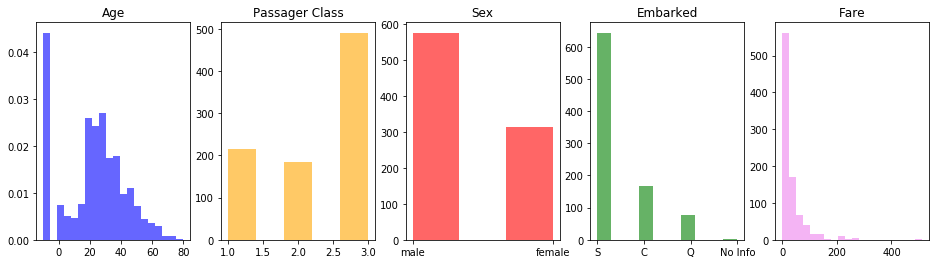

In [246]:
#Plotando algumas variaveis
############
###note que precisamos completar alguns valores pois eles não estão informados
############
fig, ax = plt.subplots(1,5, figsize=(16,4))
################
ax[0].hist(training['Age'].fillna(-10), 
         bins=20, 
         density=True,
         alpha=0.6,
         color='blue')
ax[0].set_title('Age')
################
ax[1].hist(training['Pclass'].fillna(-10),
             bins=5,
             alpha=0.6,
             color='orange')
ax[1].set_title('Passager Class')
################
ax[2].hist(training['Sex'].fillna('No Info'), 
           bins=3,
           color='red',
           alpha=0.6)
ax[2].set_title('Sex')
################
ax[3].hist(training['Embarked'].fillna('No Info'),
           color='green',
           alpha=0.6)
ax[3].set_title('Embarked')
################
ax[4].hist(training['Fare'].fillna(10**6),
           bins=20,
           color='violet',
           alpha=0.6)
ax[4].set_title('Fare')
################
plt.show()


In [247]:
def convert_sex(gender):
    """"Funçao para converter a variavael genero para binario:
    M = 1 
    H = 0
    """
    if gender == 'female':
        return 1
    elif gender == 'male':
        return 0

In [248]:
def convert_embarked(emb):
    """"Funçao para converter a variavel embarked para binario"""
    if emb == 'S':
        return 1
    elif emb == 'C':
        return 2
    elif emb == 'Q':
        return 3
    else:
        return 0

In [249]:
#Criando uma coluna no DF com o sexo, embarked para binario:
training['Sex_bin'] = training['Sex'].map(convert_sex)
test['Sex_bin'] = test['Sex'].map(convert_sex)
##
training['Embarked_bin'] = training['Embarked'].map(convert_embarked)
test['Embarked_bin'] = test['Embarked'].map(convert_embarked)

In [258]:
# Limpando os valores onde a idade não está definida
# Removendo dados com valor nulo
training_clean = training.dropna(subset=['Age'])

In [270]:
#Definindo as variaveis:
variables = ['Sex_bin', 'Embarked_bin','Age','Pclass','SibSp', 'Parch', 'Fare']

x = training_clean[variables]
y = training_clean['Survived']

#x.shape, y.shape

In [292]:
#Criando uma validação Cruzada para os modelos
from sklearn.model_selection import RepeatedKFold
#Importando os modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [307]:
kf = RepeatedKFold(n_splits=2, n_repeats=25, random_state=10)

result_1 = []
result_2 = []

for line_training, line_validation in kf.split(x):
    #Separando conjunto de dados para treino e validação do modelo
    x_training, x_validation = x.iloc[line_training], x.iloc[line_validation] 
    y_training, y_validation = y.iloc[line_training], y.iloc[line_validation]
    ############
    ##Modelo 1 : Random Forest
    ############
    model_1 = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    model_1.fit(x_training,y_training)
    prediction_1 = model_1.predict(x_validation)
    accuracy_1 = np.mean(y_validation == prediction_1)
    result_1.append(accuracy_1)
    ###########
    ##Modelo 2 : Regressão Logistica
    ###########
    model_2 = LogisticRegression(solver='lbfgs', max_iter=1000)
    model_2.fit(x_training,y_training)
    prediction_2 = model_2.predict(x_validation)
    accuracy_2 = np.mean(y_validation == prediction_2)
    result_2.append(accuracy_2)

In [308]:
print("Random Forest:", round(np.mean(result_1),4))
print("Regressão Logistica:", round(np.mean(result_2),4))

Random Forest: 0.7875
Regressão Logistica: 0.7989


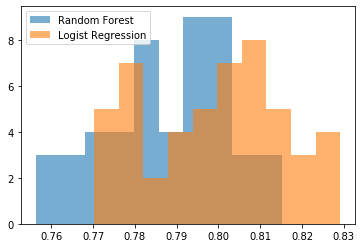

In [309]:
plt.hist(result_1, alpha=0.6, label='Random Forest')
plt.hist(result_2, alpha=0.6, label='Logist Regression')
plt.legend()
plt.show()

In [318]:
#Submissao
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x,y)

prediction = model.predict(test[variables].fillna(-1))

In [319]:
submission = pd.Series(prediction, index=test['PassengerId'], name='Survived')

In [321]:
submission.to_csv("LR_model.csv", header=True)

In [323]:
!head -n10 LR_model.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
